In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from itertools import product
import matplotlib.pyplot as plt
import random

# Regular Gradient Descent

In [2]:
def gradient_descent(point, gamma, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        p = p - gamma * gradient(*p)
        points.append(p)
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Gradient descent converged in {i} steps!")
            return p, points
    return p, points

In [3]:
def timed_gradient_descent(point, gamma, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        p = p - gamma * gradient(*p)
        points.append(p)
        if len(points) >=2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Gradient descent converged in {now - start} seconds!")
            return p, points
        now = time()
    return p, points

# Stochastic Gradient Descent

In [4]:
def stochastic_gradient_descent(point, gamma, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        p = p - gamma * gradient(*p)
        points.append(p)
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Stochastic gradient descent converged in {i} steps!")
            return p, points
    return p, points

# Polyak Gradient Descent

In [5]:
def polyak_gradient_descent(point, gamma, mu, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        if len(points) > 2:
            p = p - gamma * gradient(*p) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)

        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Polyak gradient descent converged in {i} seconds!")
            return p, points
    return p, points

In [6]:
def timed_polyak_gradient_descent(point, gamma, mu, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        if len(points) > 2:
            p = p - gamma * gradient(*p) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)

        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Polyak gradient descent converged in {now - start} steps!")
            return p, points
        now = time()
    return p, points

# Nesterov Gradient Descent

In [7]:
def nesterov_gradient_descent(point, gamma, mu, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        if len(points) > 2:
            p = p - gamma * gradient(*(p + mu * (p - points[-2]))) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)
        
        points.append(p)
        
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Nesterov gradient descent converged in {i} steps!")
            return p, points
    return p, points

In [8]:
def timed_nesterov_gradient_descent(point, gamma, mu, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        if len(points) > 2:
            p = p - gamma * gradient(*(p + mu * (p - points[-2]))) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)
        
        points.append(p)
        
        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Nesterov gradient descent converged in {now - start} seconds!")
            return p, points
        now = time()
    return p, points

# AdaGrad

In [9]:
def adaGrad(point, gamma, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    gradients = np.zeros((n_iter, point.shape[0]))
    for i in range(n_iter):
        grad = gradient(*p)
        squared_gradient = np.square(grad)
        gradients[i] = squared_gradient
        d = np.sum(gradients, axis=0)
        sqrt_d = np.sqrt(d)
        div_sqrd_d = 1/(sqrt_d + 1e-7)
        D = np.diag(div_sqrd_d)
        p = p - gamma * (D @ grad)
        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"AdaGrad converged in {i} steps!")
            return p, points
    return p, points

In [10]:
def timed_adaGrad(point, gamma, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    gradients = np.zeros(point.shape[0])
    start, now = time(), time()
    while now-start < time_limit:
        grad = gradient(*p)
        squared_gradient = np.square(grad)
        gradients += squared_gradient
        sqrt_d = np.sqrt(gradients)
        div_sqrd_d = 1/(sqrt_d + 1e-7)
        D = np.diag(div_sqrd_d)
        p = p - gamma * (D @ grad)
        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"AdaGrad converged in {now-start} seconds!")
            return p, points
        now = time()
    return p, points

# Newton method

In [11]:
def newton_method(point, gradient, hessian, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        p = p - np.linalg.inv(hessian(*p)) @ gradient(*p)

        points.append(p)
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Newton method converged in {i} steps!")
            return p, points
    return p, points

In [12]:
def timed_newton_method(point, gradient, hessian, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        p = p - np.linalg.inv(hessian(*p)) @ gradient(*p)

        points.append(p)
        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Newton method converged in {now - start} seconds!")
            return p, points
    return p, points

# BFGS

In [13]:
def BFGS(point, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    points.append(p)
    H_approx = np.identity(p.shape[0])*0.001
    previous_gradient = gradient(*p)
    for i in range(n_iter):
        
        p = p - H_approx @ previous_gradient

        current_gradient = gradient(*p)
        delta_k = p - points[-1]
        gamma_k = current_gradient - previous_gradient

        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"BFGS converged in {i} steps!")
            return p, points

        nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
        denom1 = np.inner(delta_k, gamma_k)

        nom2 = np.inner(gamma_k, H_approx@gamma_k)
        denom2 = np.inner(delta_k, gamma_k)

        nom3 = np.outer(delta_k, delta_k)
        denom3 = np.inner(delta_k, gamma_k)

        H_approx = H_approx - (nom1/denom1) + ((1 + (nom2/denom2)) * (nom3/denom3))

        previous_gradient = current_gradient
    return p, points


In [14]:
def timed_BFGS(point, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    points.append(p)
    H_approx = np.identity(p.shape[0]) * 0.001
    previous_gradient = gradient(*p)
    start, now = time(), time()
    while now-start < time_limit:
        
        p = p - H_approx @ previous_gradient

        current_gradient = gradient(*p)
        delta_k = p - points[-1]
        gamma_k = current_gradient - previous_gradient

        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"BFGS converged in {now - start} seconds!")
            return p, points

        nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
        denom1 = np.inner(delta_k, gamma_k)

        nom2 = np.inner(gamma_k, H_approx@gamma_k)
        denom2 = np.inner(delta_k, gamma_k)

        nom3 = np.outer(delta_k, delta_k)
        denom3 = np.inner(delta_k, gamma_k)

        H_approx = H_approx - (nom1/denom1) + ((1 + (nom2/denom2)) * (nom3/denom3))

        previous_gradient = current_gradient
        now = time()
    return p, points

# L-BFGS

In [15]:
def L_BFGS(point, gradient, m, n_iter=1, epsilon=0.001):
    p = point
    points = []
    gradients = []
    points.append(p)

    for k in range(n_iter):
        q = gradient(*p)
        gradients.append(q)

        alphas = []
        j = min(len(gradients), m)
        for i in range(len(gradients)-1, len(gradients)- j, -1):
            delta_i = points[i] - points[i-1]
            gamma_i = gradients[i] - gradients[i-1]
            rho_i = 1/np.dot(delta_i, gamma_i)
            a_i = rho_i*np.dot(delta_i, q)
            alphas.append(a_i)
            q = q - a_i*gamma_i

        if len(gradients) == 1:
            Bk = np.identity(point.shape[0])
        else:
            delta_i = points[-1] - points[-2]
            gamma_i = gradients[-1] - gradients[-2]
            Bk = ((np.dot(delta_i, gamma_i))/np.dot(gamma_i, gamma_i)) * np.identity(point.shape[0])
        r = Bk @ q

        for off, i in enumerate(range(len(gradients)- j + 1, len(gradients))):
            delta_i = points[i] - points[i-1]
            gamma_i = gradients[i] - gradients[i-1]
            rho_i = 1/np.dot(delta_i, gamma_i)
            a_i = alphas[-(off+1)]
            beta = rho_i * np.dot(gamma_i, r)
            r = r + delta_i*(a_i - beta)
        p = p - r
        points.append(p)

        if k != 0 and np.linalg.norm(points[-1] - points[-2]) < epsilon:
            print(f"L-FBGS converged in {k} steps")
            return p, points
    return p, points

In [16]:
a = [1,2,3,4,5]
m = 8
j = min(len(a), m)
for i in range(len(a)-1, len(a)- j, -1):
    print(i)
print("_")
for i in range(len(a)- j + 1, len(a)):
    print(i)

4
3
2
1
_
1
2
3
4


In [17]:
def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def grad_func(x, y):
    return np.array([2*x + np.e**x - y, 2*y -x])

def hessian_func(x, y):
    return np.array([[2 + np.e**x, -1],
                     [-1, 2]])

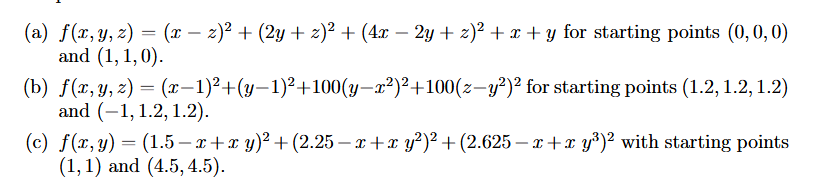

In [18]:
def f1(x, y, z):
    return (x - z) ** 2 + (2*y + z) ** 2 + (4*x -2*y + z) ** 2 + x + y

def grad_f1(x, y, z):
    dx = 34*x - 16*y + 6*z + 1
    dy = -16*x + 16*y + 1
    dz = 6*x + 6*z
    return np.array([dx, dy, dz])

def hessian_f1(x, y, z):
    return np.array([[34, -16, 6],
                [-16, 16, 0],
                [6, 0, 6]])

def f2(x, y, z):
    return ((x - 1) ** 2) + ((y - 1) ** 2) + 100*((y - (x ** 2)) ** 2) + 100*((z - (y ** 2)) ** 2)

def grad_f2(x, y , z):
    dx = 400 * (x ** 3) - 400*x*y +2*x -2
    dy = 400*(y ** 3) - 200*(x ** 2) - 400*z*y + 202*y -2
    dz = 200*z - 200*(y ** 2)
    return np.array([dx, dy, dz])

def hessian_f2(x, y, z):
    return np.array([[1200 * x ** 2 - 400 * y + 2, -400 * x, 0],
              [-400 * x, 1200 * y ** 2 - 400 * z + 202, -400 * y],
              [0, -400 * y, 200]])

def f3(x, y):
    return (1.5 - x + x*y) ** 2 + (2.25 - x + x*(y ** 2)) ** 2 + (2.625 - x + x*(y ** 3)) ** 2

def grad_f3(x, y):
    dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
    dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))
    return np.array([dx, dy])

def hessian_f3(x, y):
    return np.array([[2*(y-1)**2 + 2*(y**2-1)**2 + 2*(y**3-1)**2, 2*(1.5-x+x*y) + 2*x*(y-1) +4*y*(2.25-x+x*y**2) + 4*x*y*(y**2-1) +6*y**2*(2.625-x+x*y**3)+6*x*y**2*(y**3-1)],
                     [2*(1.5-x+x*y) + 2*x*(y-1) +4*y*(2.25-x+x*y**2) + 4*x*y*(y**2-1) +6*y**2*(2.625-x+x*y**3)+6*x*y**2*(y**3-1), 2*x**2+4*x*(2.25-x+x*y**2)+8*x**2*y**2+12*x*y*(2.625-x+x*y**3)+18*x**2*y**4]])

In [19]:
def compare_methods_with_steps(starting_point, function, gradient, hessian, n_iter, epsilon, lr):

    point1, points1 = gradient_descent(starting_point, lr, gradient, n_iter, epsilon)
    print(f"Gradient Descent: x = {point1}  |  f(x) = {function(*point1)}")

    point2, points2 = polyak_gradient_descent(starting_point, lr, 0.5, gradient, n_iter, epsilon)
    print(f"Polyak Gradient Descent: x = {point2}  |  f(x) = {function(*point2)}")

    point3, points3 = nesterov_gradient_descent(starting_point, lr, 0.5, gradient, n_iter, epsilon)
    print(f"Nesterov Gradient Descent: x = {point3}  |  f(x) = {function(*point3)}")

    point4, points4 = adaGrad(starting_point, 1, gradient, n_iter, epsilon)
    print(f"AdaGrad Gradient Descent: x = {point4}  |  f(x) = {function(*point4)}")

    point5, points5 = newton_method(starting_point, gradient, hessian, n_iter)
    print(f"Newton method: x = {point5}  |  f(x) = {function(*point5)}")

    point6, points6 = BFGS(starting_point, gradient, n_iter, epsilon)
    print(f"BFGS: x = {point6}  |  f(x) = {function(*point6)}")


In [20]:
steps = [2,5,10,100]

In [21]:
starting_points1 = [np.array([0,0,0]), np.array([1,1,0])]

for step, starting_point in product(steps, starting_points1):

    print(f"Starting point: {starting_point}, number of steps: {step}")
    print("-"*100)
    compare_methods_with_steps(starting_point, f1, grad_f1, hessian_f1, step, 1e-5, 0.01)
    print("-"*100)

Starting point: [0 0 0], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [-0.0182 -0.02    0.0006]  |  f(x) = -0.03525736
Polyak Gradient Descent: x = [-0.0182 -0.02    0.0006]  |  f(x) = -0.03525736
Nesterov Gradient Descent: x = [-0.0182 -0.02    0.0006]  |  f(x) = -0.03525736
AdaGrad Gradient Descent: x = [-0.00172553 -1.70710663  0.99999998]  |  f(x) = 24.547438853812828
Newton method converged in 1 steps!
Newton method: x = [-0.16666667 -0.22916667  0.16666667]  |  f(x) = -0.19791666666666663
BFGS: x = [-0.11133333 -0.11333333  0.00066667]  |  f(x) = -0.11352266666666666
----------------------------------------------------------------------------------------------------
Starting point: [1 1 0], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [ 0.6866  0.9512 -0.105 ]  |  f(x) = 6.041198320000001


In [22]:
starting_points2 = [np.array([1.2, 1.2, 1.2]), np.array([-1, 1.2, 1.2])]

for step, starting_point in product(steps, starting_points2):

    print(f"Starting point: {starting_point}, number of steps: {step}")
    print("-"*100)
    compare_methods_with_steps(starting_point, f2, grad_f2, hessian_f2, step, 1e-5, 0.001)
    print("-"*100)

Starting point: [1.2 1.2 1.2], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [1.06535251 1.12528986 1.25486595]  |  f(x) = 0.04237239125217664
Polyak Gradient Descent: x = [1.06535251 1.12528986 1.25486595]  |  f(x) = 0.04237239125217664
Nesterov Gradient Descent: x = [1.06535251 1.12528986 1.25486595]  |  f(x) = 0.04237239125217664
AdaGrad Gradient Descent: x = [0.32361212 1.10337583 1.20611626]  |  f(x) = 100.21139255011029
Newton method: x = [1.05776971 1.11424466 1.22854767]  |  f(x) = 0.03541789639142505
BFGS: x = [1.06192568 1.12399037 1.25610646]  |  f(x) = 0.02582746997757629
----------------------------------------------------------------------------------------------------
Starting point: [-1.   1.2  1.2], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [-1.02305097  1.13267024  1.21655427

In [36]:
starting_points3 = [np.array([1, 1]), np.array([4.5, 4.5])]

for step, starting_point in product(steps, starting_points3):

    print(f"Starting point: {starting_point}, number of steps: {step}")
    print("-"*100)
    compare_methods_with_steps(starting_point, f3, grad_f3, hessian_f3, step, 1e-10, 0.001)
    print("-"*100)

Starting point: [1 1], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [1.00073394 0.94633927]  |  f(x) = 12.807584968367372
Polyak Gradient Descent: x = [1.00073394 0.94633927]  |  f(x) = 12.807584968367372
Nesterov Gradient Descent: x = [1.00073394 0.94633927]  |  f(x) = 12.807584968367372
AdaGrad Gradient Descent: x = [ 1.99999999 -0.03601266]  |  f(x) = 0.7815248553242349
Newton method converged in 1 steps!
Newton method: x = [0. 1.]  |  f(x) = 14.203125
BFGS: x = [1.01107332 0.57690351]  |  f(x) = 6.900699454310788
----------------------------------------------------------------------------------------------------
Starting point: [4.5 4.5], number of steps: 2
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [1.93681506e+13 1.86674461e+13]  |  f(x) = 1.5873977012198753e+106
Polyak Gradient Descent: x = [1.93681506e+1

C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:33: RuntimeWarning: overflow encountered in scalar multiply
  dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:34: RuntimeWarning: overflow encountered in scalar multiply
  dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:33: RuntimeWarning: invalid value encountered in scalar add
  dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:34: RuntimeWarning: invalid value encountered in scalar add
  dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\2264529320.py:21: RuntimeWarni

In [24]:
def compare_methods_with_time(starting_point, function, gradient, hessian, time, epsilon):

    point1, points1 = timed_gradient_descent(starting_point, 0.001, gradient, time_limit=time, epsilon=epsilon)
    print(f"Gradient Descent: x = {point1}  |  f(x) = {function(*point1)}")

    point2, points2 = timed_polyak_gradient_descent(starting_point, 0.001, 0.5, gradient, time_limit=time, epsilon=epsilon)
    print(f"Polyak Gradient Descent: x = {point2}  |  f(x) = {function(*point2)}")

    point3, points3 = timed_nesterov_gradient_descent(starting_point, 0.001, 0.5, gradient, time_limit=time, epsilon=epsilon)
    print(f"Nesterov Gradient Descent: x = {point3}  |  f(x) = {function(*point3)}")

    point4, points4 = timed_adaGrad(starting_point, 1, gradient, time_limit=time, epsilon=epsilon)
    print(f"AdaGrad Gradient Descent: x = {point4}  |  f(x) = {function(*point4)}")

    point5, points5 = timed_newton_method(starting_point, gradient, hessian, time_limit=time, epsilon=epsilon)
    print(f"Newton method: x = {point5}  |  f(x) = {function(*point5)}")

    point6, points6 = timed_BFGS(starting_point, gradient, time_limit=time, epsilon=epsilon)
    print(f"BFGS: x = {point6}  |  f(x) = {function(*point6)}")


In [25]:
times = [0.1, 1, 2]

In [26]:
starting_points1 = [np.array([0,0,0]), np.array([1,1,0])]

for t, starting_point in product(times, starting_points1):

    print(f"Starting point: {starting_point}, time limit: {t}s")
    print("-"*100)
    compare_methods_with_time(starting_point, f1, grad_f1, hessian_f1, t, 1e-10)
    print("-"*100)

Starting point: [0 0 0], time limit: 0.1s
----------------------------------------------------------------------------------------------------
Gradient descent converged in 0.054511070251464844 seconds!
Gradient Descent: x = [-0.16666665 -0.22916665  0.16666664]  |  f(x) = -0.197916666666665
Polyak gradient descent converged in 0.024447917938232422 steps!
Polyak Gradient Descent: x = [-0.16666666 -0.22916666  0.16666665]  |  f(x) = -0.1979166666666662
Nesterov gradient descent converged in 0.029648303985595703 seconds!
Nesterov Gradient Descent: x = [-0.16666666 -0.22916666  0.16666665]  |  f(x) = -0.19791666666666627
AdaGrad converged in 0.0019998550415039062 seconds!
AdaGrad Gradient Descent: x = [-0.16666667 -0.22916667  0.16666667]  |  f(x) = -0.19791666666666666
Newton method converged in 0.0 seconds!
Newton method: x = [-0.16666667 -0.22916667  0.16666667]  |  f(x) = -0.19791666666666663
BFGS converged in 0.0 seconds!
BFGS: x = [-0.16666667 -0.22916667  0.16666667]  |  f(x) = -0.

In [27]:
starting_points2 = [np.array([1.2, 1.2, 1.2]), np.array([-1, 1.2, 1.2])]

for t, starting_point in product(times, starting_points2):

    print(f"Starting point: {starting_point}, time limit: {t}")
    print("-"*100)
    compare_methods_with_time(starting_point, f2, grad_f2, hessian_f2, t, 1e-10)
    print("-"*100)

Starting point: [1.2 1.2 1.2], time limit: 0.1
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [1.00056081 1.00112408 1.00225478]  |  f(x) = 1.5813911125107483e-06
Polyak Gradient Descent: x = [1.00000255 1.00000512 1.00001026]  |  f(x) = 3.278509400543577e-11
Nesterov Gradient Descent: x = [1.00001083 1.00002171 1.00004352]  |  f(x) = 5.897056040344255e-10
AdaGrad Gradient Descent: x = [0.99694597 0.99273154 0.98644754]  |  f(x) = 0.0002857789637805224
Newton method converged in 0.0 seconds!
Newton method: x = [1. 1. 1.]  |  f(x) = 1.6787946139234657e-28
BFGS converged in 0.0 seconds!
BFGS: x = [1. 1. 1.]  |  f(x) = 3.0297189141144485e-28
----------------------------------------------------------------------------------------------------
Starting point: [-1.   1.2  1.2], time limit: 0.1
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [0.

In [28]:
starting_points3 = [np.array([1, 1]), np.array([4.5, 4.5])]

for t, starting_point in product(times, starting_points3):

    print(f"Starting point: {starting_point}, time limit: {t}")
    print("-"*100)
    compare_methods_with_time(starting_point, f3, grad_f3, hessian_f3, t, 1e-10)
    print("-"*100)

Starting point: [1 1], time limit: 0.1
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [2.93914252 0.48440009]  |  f(x) = 0.0006350605341245992
Polyak Gradient Descent: x = [2.96429967 0.49094917]  |  f(x) = 0.00021240176885528264
Nesterov Gradient Descent: x = [2.93647354 0.48369684]  |  f(x) = 0.0006940900958730335
AdaGrad Gradient Descent: x = [3.00000592 0.49999426]  |  f(x) = 1.204757807588679e-09
Newton method converged in 0.0 seconds!
Newton method: x = [0. 1.]  |  f(x) = 14.203125
BFGS converged in 0.0020012855529785156 seconds!
BFGS: x = [3.  0.5]  |  f(x) = 5.127595883936577e-30
----------------------------------------------------------------------------------------------------
Starting point: [4.5 4.5], time limit: 0.1
----------------------------------------------------------------------------------------------------
Gradient Descent: x = [nan nan]  |  f(x) = nan
Polyak Gradient Descent: x = [nan nan

C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:33: RuntimeWarning: overflow encountered in scalar multiply
  dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:34: RuntimeWarning: overflow encountered in scalar multiply
  dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:33: RuntimeWarning: invalid value encountered in scalar add
  dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1666910542.py:34: RuntimeWarning: invalid value encountered in scalar add
  dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))


Nesterov Gradient Descent: x = [nan nan]  |  f(x) = nan
AdaGrad Gradient Descent: x = [1.44587407 0.96376539]  |  f(x) = 12.823659784560629
Newton method converged in 0.0 seconds!
Newton method: x = [3.37253814e-26 1.00000000e+00]  |  f(x) = 14.203125
BFGS: x = [nan nan]  |  f(x) = nan
----------------------------------------------------------------------------------------------------
Starting point: [1 1], time limit: 1
----------------------------------------------------------------------------------------------------


C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1854726025.py:22: RuntimeWarning: invalid value encountered in matmul
  nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
C:\Users\matej\AppData\Local\Temp\ipykernel_14536\1854726025.py:25: RuntimeWarning: invalid value encountered in matmul
  nom2 = np.inner(gamma_k, H_approx@gamma_k)


Gradient descent converged in 0.7471287250518799 seconds!
Gradient Descent: x = [2.99999968 0.49999992]  |  f(x) = 1.6569564286332804e-14
Polyak gradient descent converged in 0.506929874420166 steps!
Polyak Gradient Descent: x = [2.99999984 0.49999996]  |  f(x) = 4.1337000146402385e-15
Nesterov gradient descent converged in 0.6416788101196289 seconds!
Nesterov Gradient Descent: x = [2.99999984 0.49999996]  |  f(x) = 4.136092788266923e-15
AdaGrad converged in 0.17331552505493164 seconds!
AdaGrad Gradient Descent: x = [3.  0.5]  |  f(x) = 4.369779070677727e-20
Newton method converged in 0.0 seconds!
Newton method: x = [0. 1.]  |  f(x) = 14.203125
BFGS converged in 0.0009963512420654297 seconds!
BFGS: x = [3.  0.5]  |  f(x) = 5.127595883936577e-30
----------------------------------------------------------------------------------------------------
Starting point: [4.5 4.5], time limit: 1
----------------------------------------------------------------------------------------------------
Gr

# Linear regression

In [29]:
def data_generating_process(num):
    np.random.seed(42)

    xs = []
    ys = []
    for i in range(1, num):
        
        x = i
        y = i + np.random.uniform(0, 1)

        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [30]:
class linear_regression():

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def gradient(self, betas):
        residuals = self.y - np.dot(betas, self.X)

        return -2 * np.dot(self.X.T, residuals)

    def build(self):
        self.X = np.column_stack((self.X, np.ones(self.X.shape[0])))

        betas, _ = gradient_descent(np.array([0,0]), 0.1, self.gradient, 100)
        return betas

In [31]:
global xs
global ys

starting_point = np.array([0,0])
n_iters = 1000
epsilon = 0.0001
mu = 0.5

random.seed(42)

def gradient(b1, b0):
    betas = np.array([b1,b0])
    residuals = ys - np.dot(xs, betas)
    return (-2/xs.shape[0]) * np.dot(xs.T, residuals) # i used MSE instead of just a sum of errors for numerical stability

def stochastic_gradient(b1, b0):
    ind = random.randint(0, xs.shape[0]-1)
    betas = np.array([b1,b0])
    x_cur = xs[ind]
    y_cur = ys[ind]
    residual = y_cur - np.dot(x_cur, betas)
    return -2*np.dot(x_cur.T, residual)

def hessian(b1, b0):
    return (2/xs.shape[0]) * np.dot(xs.T, xs)

data_sizes = [50, 100, 1000, 10000, 100000, 1000000]
for size in data_sizes:
    xs, ys = data_generating_process(size)

    print(f"Data size: {size}")
    print("-"*100)
    xs = np.column_stack((xs, np.ones(xs.shape[0])))

    betas1, _ = gradient_descent(starting_point, 1/size**2, gradient, n_iters, epsilon)
    print(f"Gradient descent: {betas1}")
    betas2, _ = stochastic_gradient_descent(starting_point, 1/size**2, stochastic_gradient, n_iters, epsilon)
    print(f"Stochastic gradient descent: {betas2}")
    betas3, _ = newton_method(starting_point, gradient, hessian, n_iters, epsilon)
    print(f"Newton method: {betas3}")
    betas4, _ = BFGS(starting_point, gradient, n_iters, epsilon)
    print(f"BFGS: {betas4}")
    betas5, _ = L_BFGS(starting_point, gradient, 10, n_iters, epsilon)
    print(f"L-BFGS: {betas5}")
    print("-"*100)


#b1, b0 = betas[0], betas[1]

# x =  np.linspace(0, 10, 100)
# y = b0 + b1 * x

# plt.scatter(xs[:,0], ys)
# plt.plot(x, y, label=f'y = {b0} + {b1}x', color='red')
# print(betas)

Data size: 50
----------------------------------------------------------------------------------------------------
Gradient descent converged in 9 steps!
Gradient descent: [1.01255084 0.03153748]
Stochastic gradient descent converged in 19 steps!
Stochastic gradient descent: [1.01324697 0.0318547 ]
Newton method converged in 1 steps!
Newton method: [0.99937674 0.46683347]
BFGS converged in 4 steps!
BFGS: [0.99937674 0.46683347]
L-FBGS converged in 4 steps
L-BFGS: [0.99937674 0.46683347]
----------------------------------------------------------------------------------------------------
Data size: 100
----------------------------------------------------------------------------------------------------
Gradient descent converged in 9 steps!
Gradient descent: [1.00700063 0.0153971 ]
Stochastic gradient descent converged in 15 steps!
Stochastic gradient descent: [1.01291836 0.0187166 ]
Newton method converged in 1 steps!
Newton method: [1.00043738 0.45197123]
BFGS converged in 4 steps!
BFGS

In [33]:
hessian_f3(*np.array([1,1]))

array([[ 0.  , 27.75],
       [27.75, 68.5 ]])